# Importing Python libraries

In [17]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import cm
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import yfinance as yf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from datetime import datetime
from keras.layers import Activation
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import VotingRegressor
# from prettytable import PrettyTable


import warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------------------------------------------------------------

<div class="alert alert-block alert-info">  
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
<h1><center><strong> TSLA Stock</strong></center></h1>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
        
</div>

# Loading dataset

In [18]:
data = yf.Ticker("TSLA")
data = data.history(period='10y')

# ------------------------------------------------------------------------------------------------------

# Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [4]:
data.head()

Open   High    Low  Close   Volume  Dividends  Stock Splits
Date                                                                    
2011-07-21  5.782  5.832  5.620  5.740  5057500          0           0.0
2011-07-22  5.740  5.908  5.710  5.858  2917500          0           0.0
2011-07-25  5.802  5.850  5.688  5.698  3366500          0           0.0
2011-07-26  5.662  5.754  5.594  5.600  3803000          0           0.0
2011-07-27  5.700  5.700  5.502  5.528  4792500          0           0.0

### Five last records of data

In [5]:
data.tail()

Open        High         Low       Close    Volume  \
Date                                                                   
2021-07-14  670.750000  678.609985  652.840027  653.380005  21641200   
2021-07-15  658.390015  666.140015  637.880005  650.599976  20209600   
2021-07-16  654.679993  656.700012  642.200012  644.219971  16339800   
2021-07-19  629.890015  647.200012  621.289978  646.219971  21240800   
2021-07-20  651.989990  662.391602  640.549988  660.500000  14999476   

            Dividends  Stock Splits  
Date                                 
2021-07-14          0           0.0  
2021-07-15          0           0.0  
2021-07-16          0           0.0  
2021-07-19          0           0.0  
2021-07-20          0           0.0

### Columns/features in data

In [6]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

### Length of data

In [7]:
print('lenght of data is', len(data))

lenght of data is 2516


### Shape of data

In [8]:
data.shape

(2516, 7)

### Data information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2011-07-21 to 2021-07-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2516 non-null   float64
 1   High          2516 non-null   float64
 2   Low           2516 non-null   float64
 3   Close         2516 non-null   float64
 4   Volume        2516 non-null   int64  
 5   Dividends     2516 non-null   int64  
 6   Stock Splits  2516 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 157.2 KB


### Data types of all columns

In [10]:
data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits    float64
dtype: object

### Checking missing Values

In [19]:
data[data.isnull().any(axis=1)].head()

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []

### Count of missing values

In [20]:
np.sum(data.isnull().any(axis=1))

0

### Is there any missing values?

In [21]:
data.isnull().values.any()

False

### Counts of missing values in each column

In [22]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### Data Description

In [23]:
data.describe()

Open         High          Low        Close        Volume  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2.516000e+03   
mean    101.431470   103.618154    99.049657   101.467502  3.430479e+07   
std     172.319269   176.127903   167.950109   172.333186  2.883152e+07   
min       4.386000     4.622000     4.300000     4.390000  1.198000e+06   
25%      35.274999    36.112500    34.465499    35.521501  1.634258e+07   
50%      47.485001    48.550001    46.820999    47.701000  2.752100e+07   
75%      65.906000    67.260498    64.916000    66.181499  4.285412e+07   
max     891.380005   900.400024   871.599976   883.090027  3.046940e+08   

       Dividends  Stock Splits  
count     2516.0   2516.000000  
mean         0.0      0.001987  
std          0.0      0.099682  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0      5.000000

# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### OPEN price values plot

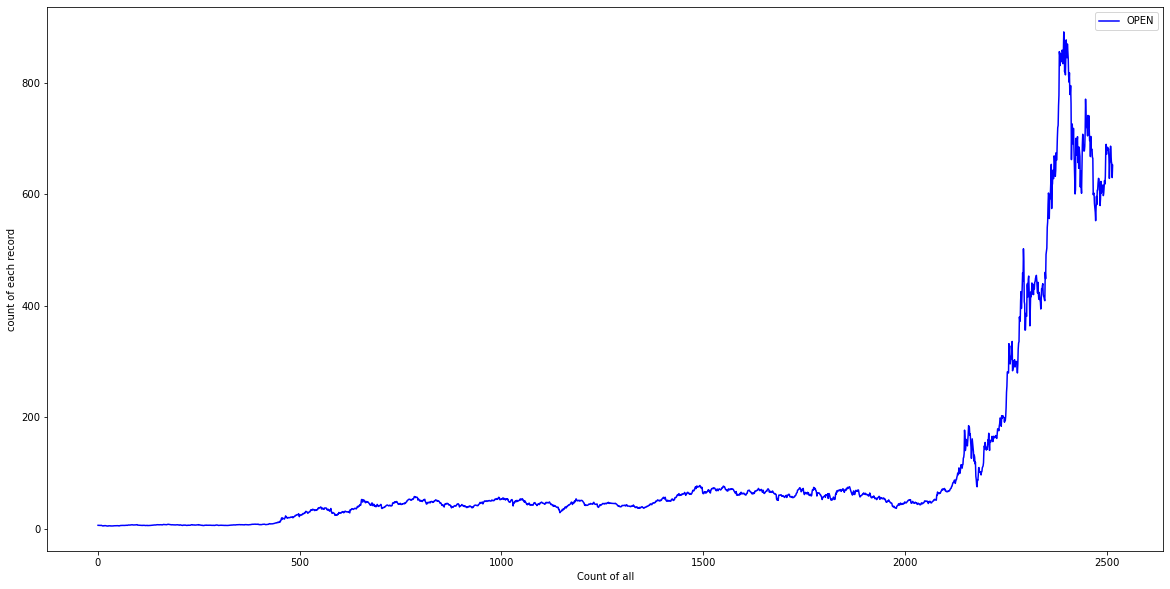

In [15]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(data['Open'].values,color='blue',label='OPEN')

plt.xlabel('Count of all')
plt.ylabel('count of each record')
plt.legend(loc='best')
plt.show()

### Counts Distribution of top 10 OPEN values

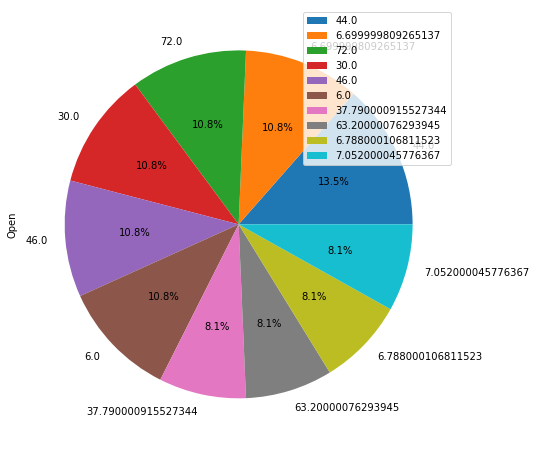

In [16]:
data["Open"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

### HIGH price values plot

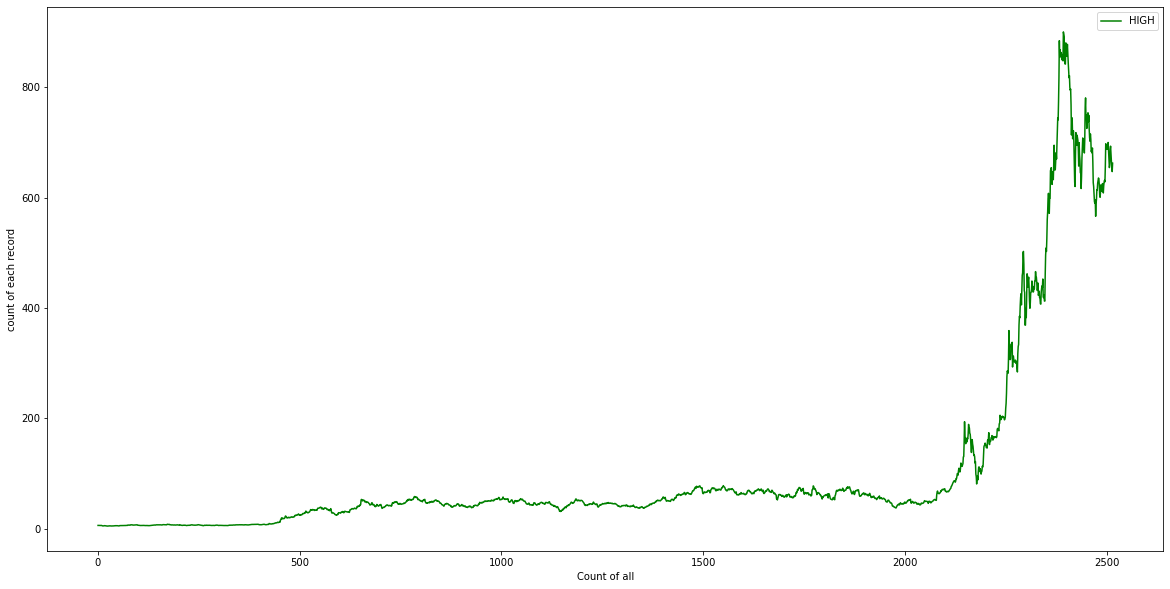

In [17]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(data['High'].values,color='green',label='HIGH')

plt.xlabel('Count of all')
plt.ylabel('count of each record')
plt.legend(loc='best')
plt.show()

### Counts Distribution of top 10 HIGH values

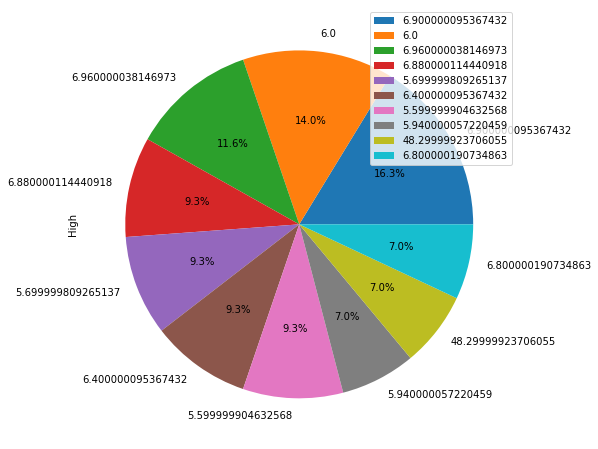

In [18]:
data["High"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

### LOW price values plot

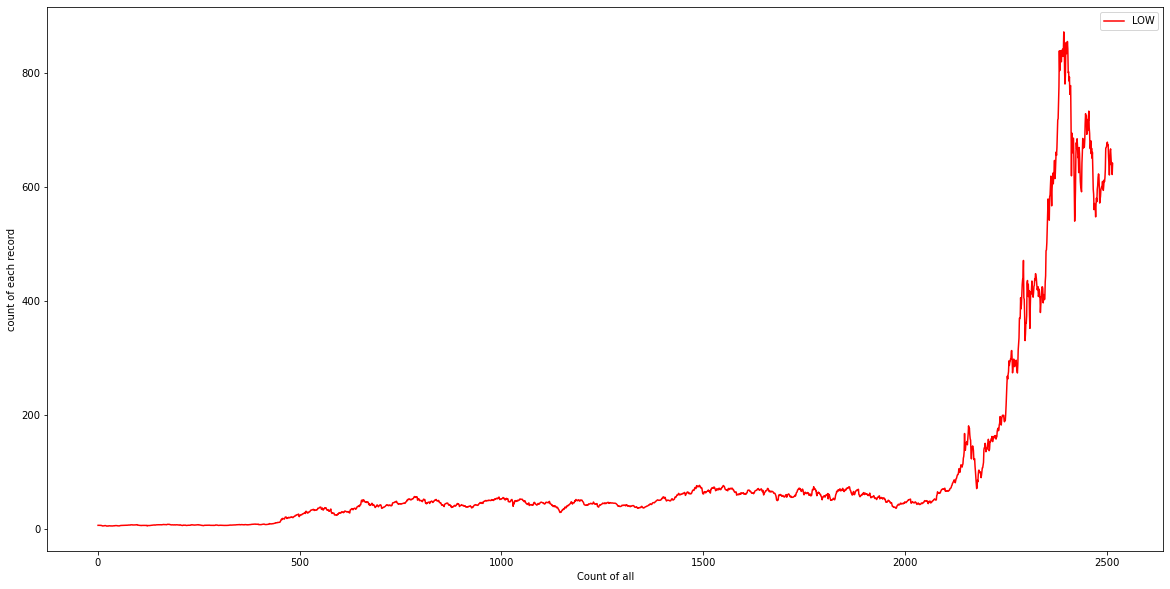

In [19]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(data['Low'].values,color='red',label='LOW')

plt.xlabel('Count of all')
plt.ylabel('count of each record')
plt.legend(loc='best')
plt.show()

### Counts Distribution of top 10 LOW values

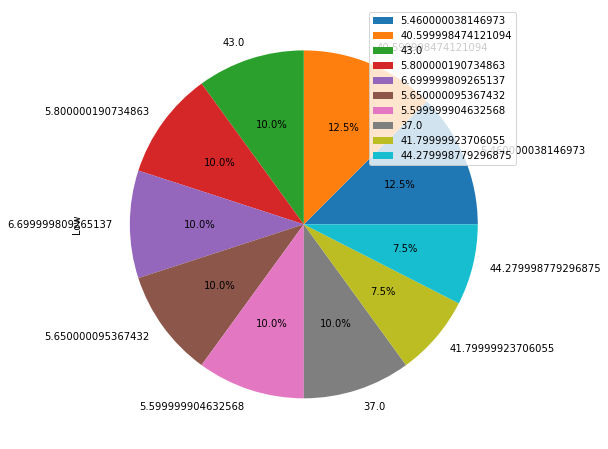

In [20]:
data["Low"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

### CLOSE price values plot

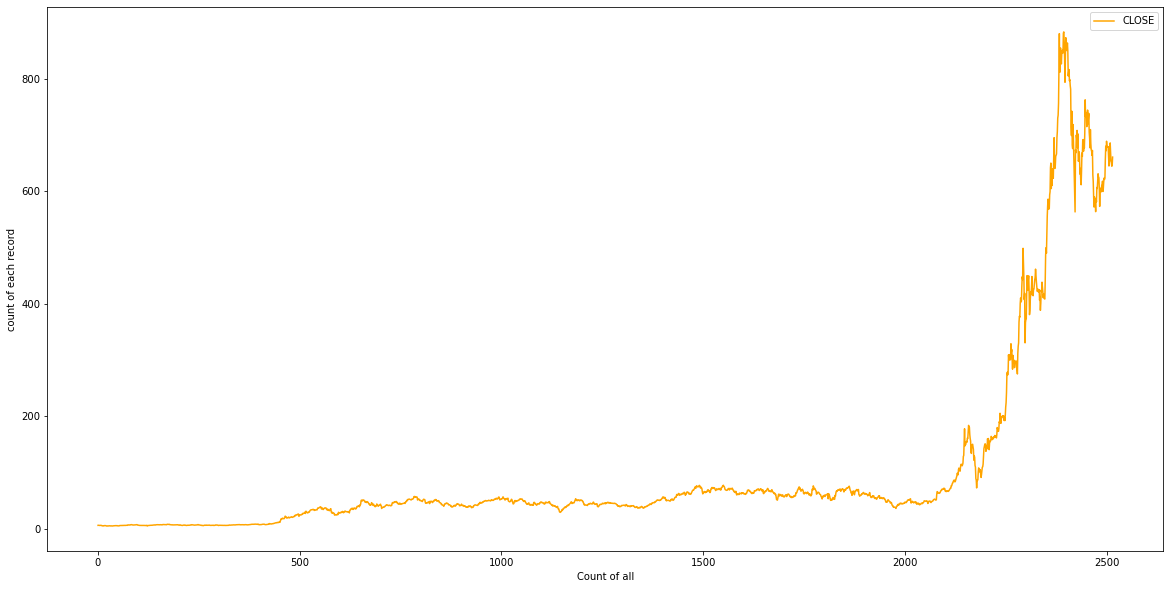

In [21]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(data['Close'].values,color='orange',label='CLOSE')

plt.xlabel('Count of all')
plt.ylabel('count of each record')
plt.legend(loc='best')
plt.show()

### Counts Distribution of top 10 CLOSE values

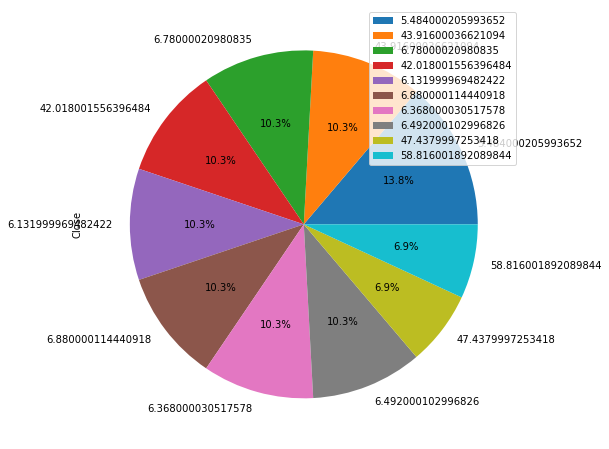

In [22]:
data["Close"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

# ------------------------------------------------------------------------------------------------------

# Data Preparation and Feature Extraction

# ------------------------------------------------------------------------------------------------------

### stochastic features 

In [1]:

from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

def stochastic(df, k, d):
    low_min  = df['Low'].rolling(window=k).min()
    high_max = df['High'].rolling( window=k).max()
    df['stochastic_k'] = 100 * (df['Close'] - low_min)/(high_max - low_min)
    df['stochastic_d'] = df['stochastic_k'].rolling(window=d).mean()
    return df

stochs = stochastic(data, k=14, d=3)
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_k.tail(365), name='K stochastic'))
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_d.tail(365), name='D stochastic'))
fig.show()

NameError: name 'data' is not defined

### EMA, MACD, MACD single features 

In [24]:

EMA_12 = pd.Series(data['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(data['Close'].ewm(span=26, min_periods=26).mean())
MACD = pd.Series(EMA_12 - EMA_26)
data['MACD']=pd.Series(EMA_12 - EMA_26)
MACD_signal = pd.Series(MACD.ewm(span=9, min_periods=9).mean())
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=MACD, name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=MACD_signal, name='Signal line'), row=2, col=1)
fig.show()

<AxesSubplot:xlabel='Date'>

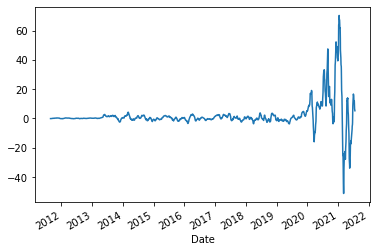

In [25]:
data['MACD'].plot()

### Moving average features

In [26]:
data['EMA_50'] = data['Close'].ewm(50).mean().shift()
data['EMA_200'] =data['Close'].ewm(200).mean().shift()
data['MA_50'] = data['Close'].rolling(50).mean()
data['MA_200'] = data['Close'].rolling(200).mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_50, name='EMA 50'))
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_200, name='EMA 200'))
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.MA_50, name='MA 50'))
fig.add_trace(go.Scatter(x=data.index, y=data.MA_200, name='MA 200'))

fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

### Relative Strength Index RSI 7 and 14 features

In [28]:
def RSI(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi


data['RSI 7'] = RSI(data).fillna(0)
fig = go.Figure(go.Scatter(x=data.index, y=data['RSI 7']))
fig.show()

In [29]:
data['RSI 14'] = RSI(data).fillna(0)
fig = go.Figure(go.Scatter(x=data.index, y=data['RSI 14']))
fig.show()

### Bollinger bands features

In [30]:
def bbands(price, length=30, numsd=2):
    ave = price.rolling(window = length, center = False).mean()
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

data['BB_Middle_Band'], data['BB_Upper_Band'], data['BB_Lower_Band'] = bbands(data['Close'], length=20, numsd=1)

In [31]:
fig = go.Figure(go.Scatter(x=data.index, y=data['BB_Middle_Band']))
fig.show()

### Calculation of Aroon Oscillator features

In [32]:
def aroon(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df.index):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [33]:
listofzeros = [0] * 25
up, down = aroon(data)
aroon_list = [x - y for x, y in zip(up,down)]
if len(aroon_list)==0:
    aroon_list = [0] * data.shape[0]
    data['Aroon_Oscillator'] = aroon_list
else:
    data['Aroon_Oscillator'] = listofzeros+aroon_list

In [34]:
fig = go.Figure(go.Scatter(x=data.index, y=data['Aroon_Oscillator']))
fig.show()

### Average Directional Index features

In [35]:
data['ATR'] = data['Close'].rolling(window=14).mean()
def DMI(df, period):
    df['UpMove'] = df['High'] - df['High'].shift(1)
    df['DownMove'] = df['Low'].shift(1) - df['Low']
    df['Zero'] = 0

    df['PlusDM'] = np.where((df['UpMove'] > df['DownMove']) & (df['UpMove'] > df['Zero']), df['UpMove'], 0)
    df['MinusDM'] = np.where((df['UpMove'] < df['DownMove']) & (df['DownMove'] > df['Zero']), df['DownMove'], 0)

    df['plusDI'] = 100 * (df['PlusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
    df['minusDI'] = 100 * (df['MinusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()

    df['ADX'] = 100 * (abs((df['plusDI'] - df['minusDI'])/(df['plusDI'] + df['minusDI']))).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
DMI(data, 14)

In [36]:
fig = go.Figure(go.Scatter(x=data.index, y=data['ADX']))
fig.show()

# Final Data after features extraction and preparation

In [24]:
data=data.replace(np.NaN, 0)
data

Open        High         Low       Close    Volume  \
Date                                                                   
2011-07-21    5.782000    5.832000    5.620000    5.740000   5057500   
2011-07-22    5.740000    5.908000    5.710000    5.858000   2917500   
2011-07-25    5.802000    5.850000    5.688000    5.698000   3366500   
2011-07-26    5.662000    5.754000    5.594000    5.600000   3803000   
2011-07-27    5.700000    5.700000    5.502000    5.528000   4792500   
...                ...         ...         ...         ...       ...   
2021-07-14  670.750000  678.609985  652.840027  653.380005  21641200   
2021-07-15  658.390015  666.140015  637.880005  650.599976  20209600   
2021-07-16  654.679993  656.700012  642.200012  644.219971  16339800   
2021-07-19  629.890015  647.200012  621.289978  646.219971  21297100   
2021-07-20  651.989990  662.390015  640.500000  660.500000  15442700   

            Dividends  Stock Splits  
Date                                 
2011-07-21          0           0.0  
2011-07-22          0           0.0  
2011-07-25          0           0.0  
2011-07-26          0           0.0  
2011-07-27          0           0.0  
...               ...           ...  
2021-07-14          0           0.0  
2021-07-15          0           0.0  
2021-07-16          0           0.0  
2021-07-19          0           0.0  
2021-07-20          0           0.0  

[2516 rows x 7 columns]

# -----------------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [38]:
X=data.drop('Close', axis=1)
X

Open        High         Low    Volume  Dividends  \
Date                                                                  
2011-07-21    5.782000    5.832000    5.620000   5057500          0   
2011-07-22    5.740000    5.908000    5.710000   2917500          0   
2011-07-25    5.802000    5.850000    5.688000   3366500          0   
2011-07-26    5.662000    5.754000    5.594000   3803000          0   
2011-07-27    5.700000    5.700000    5.502000   4792500          0   
...                ...         ...         ...       ...        ...   
2021-07-14  670.750000  678.609985  652.840027  21641200          0   
2021-07-15  658.390015  666.140015  637.880005  20209600          0   
2021-07-16  654.679993  656.700012  642.200012  16339800          0   
2021-07-19  629.890015  647.200012  621.289978  21240800          0   
2021-07-20  651.989990  662.391602  640.549988  14999476          0   

            Stock Splits  stochastic_k  stochastic_d       MACD      EMA_50  \
Date                                                                          
2011-07-21           0.0      0.000000      0.000000   0.000000    0.000000   
2011-07-22           0.0      0.000000      0.000000   0.000000    5.740000   
2011-07-25           0.0      0.000000      0.000000   0.000000    5.799584   
2011-07-26           0.0      0.000000      0.000000   0.000000    5.765050   
2011-07-27           0.0      0.000000      0.000000   0.000000    5.722554   
...                  ...           ...           ...        ...         ...   
2021-07-14           0.0     41.387971     61.637481  10.036801  648.498979   
2021-07-15           0.0     37.892836     46.576114   8.432826  648.594685   
2021-07-16           0.0     29.871706     36.384171   6.571104  648.634004   
2021-07-19           0.0     32.386165     33.383569   5.197150  648.547455   
2021-07-20           0.0     50.339438     37.532437   5.200611  648.501818   

            ...  Aroon_Oscillator         ATR     UpMove   DownMove  Zero  \
Date        ...                                                             
2011-07-21  ...               0.0    0.000000   0.000000   0.000000     0   
2011-07-22  ...               0.0    0.000000   0.076000  -0.090000     0   
2011-07-25  ...               0.0    0.000000  -0.058000   0.022000     0   
2011-07-26  ...               0.0    0.000000  -0.096000   0.094000     0   
2011-07-27  ...               0.0    0.000000  -0.054000   0.092000     0   
...         ...               ...         ...        ...        ...   ...   
2021-07-14  ...              48.0  669.950003 -14.670044  13.459961     0   
2021-07-15  ...              48.0  667.862858 -12.469971  14.960022     0   
2021-07-16  ...              48.0  665.887857  -9.440002  -4.320007     0   
2021-07-19  ...              48.0  662.852142  -9.500000  20.910034     0   
2021-07-20  ...              48.0  661.404999  15.191589 -19.260010     0   

               PlusDM    MinusDM    plusDI   minusDI        ADX  
Date                                                             
2011-07-21   0.000000   0.000000  0.000000  0.000000   0.000000  
2011-07-22   0.076000   0.000000  0.000000  0.000000   0.000000  
2011-07-25   0.000000   0.022000  0.000000  0.000000   0.000000  
2011-07-26   0.000000   0.094000  0.000000  0.000000   0.000000  
2011-07-27   0.000000   0.092000  0.000000  0.000000   0.000000  
...               ...        ...       ...       ...        ...  
2021-07-14   0.000000  13.459961  1.017420  0.872613  29.209246  
2021-07-15   0.000000  14.960022  0.881764  1.054929  26.506848  
2021-07-16   0.000000   0.000000  0.764196  0.914272  24.164770  
2021-07-19   0.000000  20.910034  0.662303  1.212976  24.858117  
2021-07-20  15.191589   0.000000  0.880245  1.051246  22.724146  

[2516 rows x 28 columns]

### Taking target as output

In [39]:
y=data['Close']
y

Date
2011-07-21      5.740000
2011-07-22      5.858000
2011-07-25      5.698000
2011-07-26      5.600000
2011-07-27      5.528000
                 ...    
2021-07-14    653.380005
2021-07-15    650.599976
2021-07-16    644.219971
2021-07-19    646.219971
2021-07-20    660.500000
Name: Close, Length: 2516, dtype: float64

### Features Normalization

In [40]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

# Spliting Dataset into 70% Training and 30% Testing

In [41]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# --------------------------------------------------------------------------------------------------

# Random Forest Model

In [42]:
RF=RandomForestRegressor()
RF= RF.fit(X_train , y_train)
RF

RandomForestRegressor()

# Evaluation Measures on Test data

# R2

In [43]:
y_pred_test = RF.predict(X_test)
rf_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(rf_test_rs,3))

R Squared :  0.999


# MSE

In [44]:
rf_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(rf_test_mse,3))

Mean Squared Error:  16.055


# MAE

In [45]:
rf_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(rf_test_MAE,3))

Mean Absolute Error:  1.44


# Predictions and Actual Stock Price

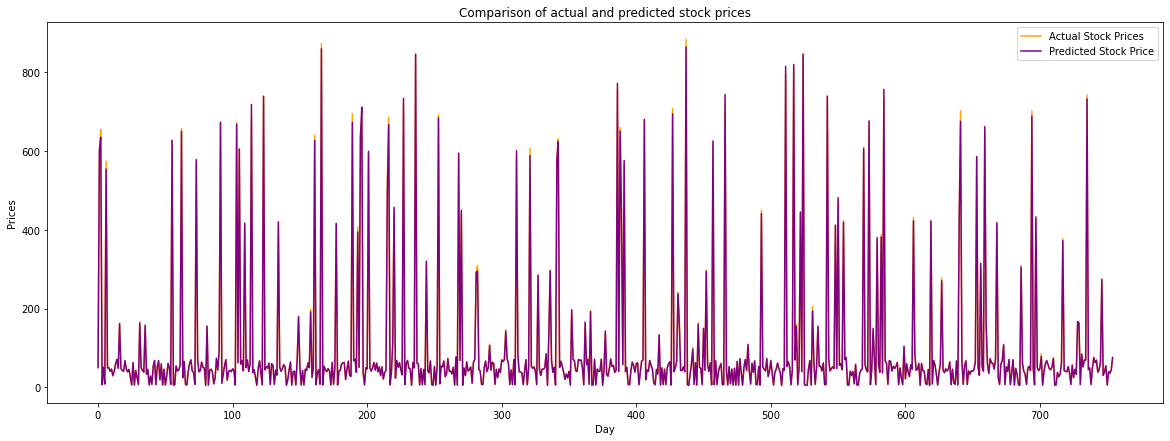

In [46]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='purple',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# XGBoost Model

In [47]:
XGB=XGBRegressor()
XGB= XGB.fit(X_train, y_train)
XGB

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Evaluation Measures on Test data

# R2

In [48]:
y_pred_test = XGB.predict(X_test)
xgb_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(xgb_test_rs,3))

R Squared :  0.999


# MSE

In [49]:
XGB_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(XGB_test_mse,3))

Mean Squared Error:  34.969


# MAE

In [50]:
XGB_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(XGB_test_MAE,3))

Mean Absolute Error:  1.904


# Predictions and Actual Stock Price

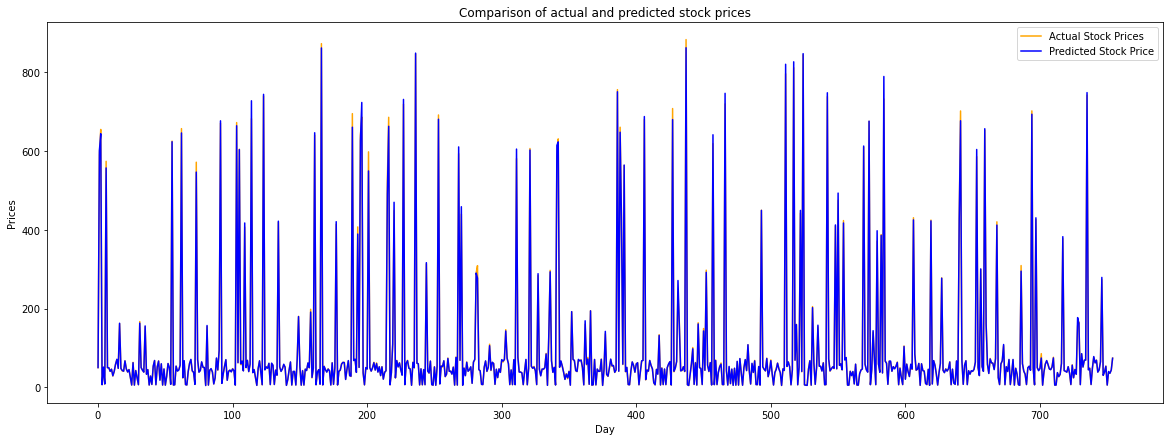

In [51]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='blue',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# Ensemble learning Model

In [52]:
RF_1=RandomForestRegressor()
XGB_1=XGBRegressor()

In [53]:
Hyib = VotingRegressor( estimators= [('RF',RF_1),('XGB',XGB_1)])
Hyib= Hyib.fit(X_train , y_train)
Hyib

VotingRegressor(estimators=[('RF', RandomForestRegressor()),
                            ('XGB',
                             XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          ra

# Evaluation Measures on Test data

# R2

In [54]:
y_pred_test = Hyib.predict(X_test)
Hyib_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(Hyib_test_rs,3))

R Squared :  0.999


# MSE

In [55]:
Hyib_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(Hyib_test_mse,3))

Mean Squared Error:  21.525


# MAE

In [56]:
Hyib_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(Hyib_test_MAE,3))

Mean Absolute Error:  1.573


# Predictions and Actual Stock Price

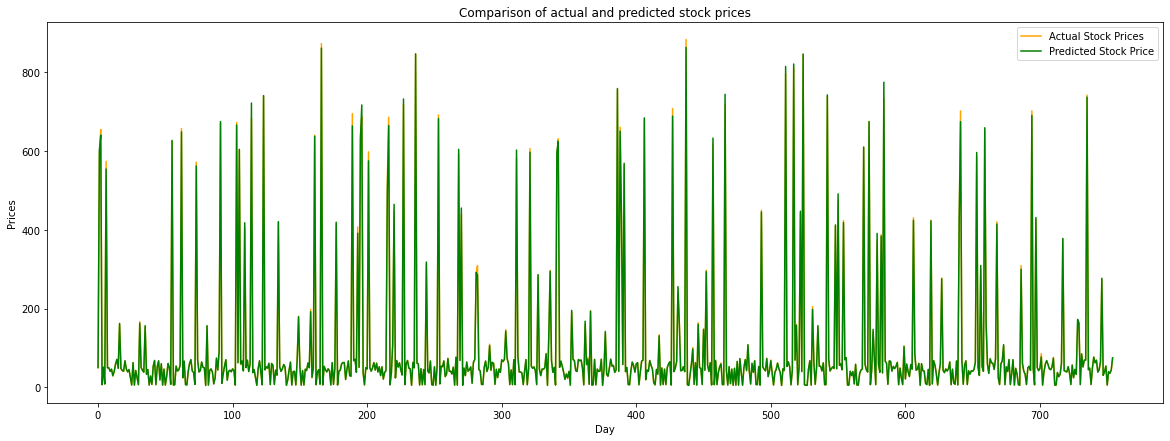

In [57]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='green',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# ------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------

# RNN Model

# ------------------------------------------------------------------------------------------------------

In [58]:
def RNN_model():
    RNN = Sequential()
    RNN.add(Dense(64,input_shape=(28,)))
    RNN.add(Dropout(0.2))
    RNN.add(Activation('relu'))
    RNN.add(Dense(64))
    RNN.add(Dropout(0.2))
    RNN.add(Activation('relu'))
    RNN.add(Dense(1))
    RNN.add(Dropout(0.2))
    RNN.add(Activation('relu'))
    return RNN
RNN_model=RNN_model()
RNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6

In [59]:
RNN_model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
RNN_model.fit(X_train, y_train, epochs=100, batch_size=1000)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 40902.3164
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 40498.3359
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 39820.4023
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 38484.0938
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 36515.2930
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 33718.2578
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 30744.0039
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 27435.5566
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 23972.1836
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 22293.1934
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 22469.9414
Epoch 12/100
2/2 [==============================] - 0s 3ms/step - loss: 20878.0645
Epoch 13/100


### R2

In [60]:
y_pred_test = RNN_model.predict(X_test)
RNN_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(RNN_test_rs,3))

R Squared :  0.938


### MSE

In [61]:
RNN_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(RNN_test_mse,3))

Mean Squared Error:  1734.677


### MAE

In [62]:
RNN_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(RNN_test_MAE,3))

Mean Absolute Error:  20.138


# Predictions and Actual Stock Price

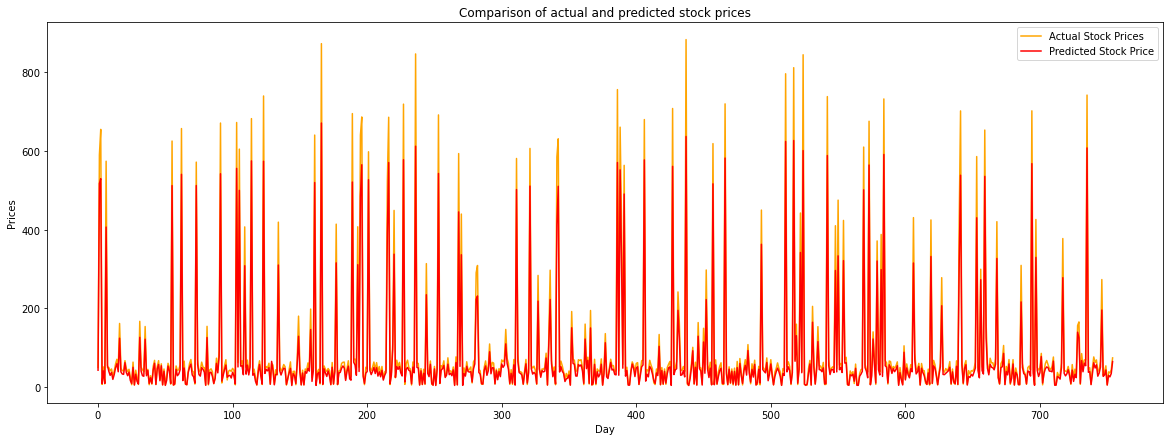

In [63]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='red',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# ------------------------------------------------------------------------------------------------------

# Comparison of all algorithms Results on R2 score

In [64]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms")
x.field_names = ["Model", "R2 Score"]


x.add_row(["Random Forest Algorithm", round(rf_test_rs,3)])
x.add_row(["XGB Algorithm",  round(xgb_test_rs,3)])
x.add_row(["Ensemble Learning Algorithm",  round(Hyib_test_rs,3)])
x.add_row(["Neural Network Model", round(RNN_test_rs,3)])


print(x)
print('\n')



Comparison of all algorithms
+-----------------------------+----------+
|            Model            | R2 Score |
+-----------------------------+----------+
|   Random Forest Algorithm   |  0.999   |
|        XGB Algorithm        |  0.999   |
| Ensemble Learning Algorithm |  0.999   |
|     Neural Network Model    |  0.938   |
+-----------------------------+----------+




# Comparison of all algorithms Results on MSE score

In [65]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms")
x.field_names = ["Model", "MSE score"]


x.add_row(["Random Forest Algorithm", round(rf_test_mse,3)])
x.add_row(["XGB Algorithm",  round(XGB_test_mse,3)])
x.add_row(["Ensemble Learning Algorithm",  round(Hyib_test_mse,3)])
x.add_row(["Neural Network Model", round(RNN_test_mse,3)])


print(x)
print('\n')



Comparison of all algorithms
+-----------------------------+-----------+
|            Model            | MSE score |
+-----------------------------+-----------+
|   Random Forest Algorithm   |   16.055  |
|        XGB Algorithm        |   34.969  |
| Ensemble Learning Algorithm |   21.525  |
|     Neural Network Model    |  1734.677 |
+-----------------------------+-----------+




# Comparison of all algorithms Results on MAE score

In [66]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms")
x.field_names = ["Model", "MAE score"]


x.add_row(["Random Forest Algorithm", round(rf_test_MAE,3)])
x.add_row(["XGB Algorithm",  round(XGB_test_MAE,3)])
x.add_row(["Ensemble Learning Model",  round(Hyib_test_MAE,3)])
x.add_row(["Neural Network Model", round(RNN_test_MAE,3)])

print(x)
print('\n')



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
| Random Forest Algorithm |    1.44   |
|      XGB Algorithm      |   1.904   |
| Ensemble Learning Model |   1.573   |
|   Neural Network Model  |   20.138  |
+-------------------------+-----------+




# Graph of MSE of each algorithm

<AxesSubplot:xlabel='Algorithm'>

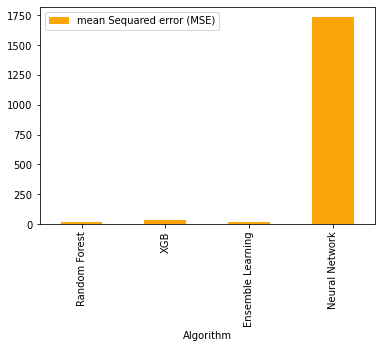

In [67]:
Result_Comp = pd.DataFrame({'Algorithm':['Random Forest'], 'mean Sequared error (MSE)': [rf_test_mse]})
Result_Comp1 = pd.DataFrame({'Algorithm':['XGB'], 'mean Sequared error (MSE)': [XGB_test_mse]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Ensemble Learning'], 'mean Sequared error (MSE)': [Hyib_test_mse]})
Result_Comp3 = pd.DataFrame({'Algorithm':['Neural Network'], 'mean Sequared error (MSE)': [RNN_test_mse]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2,Result_Comp3])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(.2, .4, 6))
Result_Comp.plot(kind='bar',figsize=(6, 4),stacked=True, color=color, legend=True)

# Graph of R2 of each algorithm

<AxesSubplot:xlabel='Algorithm'>

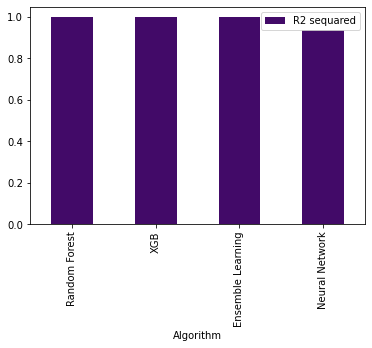

In [68]:
Result_Comp = pd.DataFrame({'Algorithm':['Random Forest'], 'R2 sequared': [rf_test_rs]})
Result_Comp1 = pd.DataFrame({'Algorithm':['XGB'], 'R2 sequared': [xgb_test_rs]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Ensemble Learning'], 'R2 sequared': [Hyib_test_rs]})
Result_Comp3 = pd.DataFrame({'Algorithm':['Neural Network'], 'R2 sequared': [RNN_test_rs]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2,Result_Comp3])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(0.8, 0.5, 2))
Result_Comp.plot(kind='bar', figsize=(6, 4),color=color)

# Graph of MAE of each algorithm

<AxesSubplot:xlabel='Algorithm'>

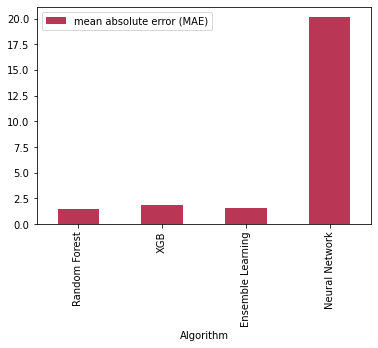

In [69]:
Result_Comp = pd.DataFrame({'Algorithm':['Random Forest'],'mean absolute error (MAE)': [rf_test_MAE]})
Result_Comp1 = pd.DataFrame({'Algorithm':['XGB'], 'mean absolute error (MAE)': [XGB_test_MAE]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Ensemble Learning'], 'mean absolute error (MAE)': [Hyib_test_MAE]})
Result_Comp3 = pd.DataFrame({'Algorithm':['Neural Network'], 'mean absolute error (MAE)': [RNN_test_MAE]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2,Result_Comp3])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(0.5, 0.2, 7))
Result_Comp.plot(kind='bar', figsize=(6, 4),color=color)